<a href="https://colab.research.google.com/github/RodrigoSchneiderr/Portfolio/blob/main/Machine_Learning_Regress%C3%A3o_Linear_Prevendo_Resultados_Conceito_Enade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('/content/Dados para Analise Enade Atual.csv', sep= ';')

In [3]:
dados

,Ano,Código da Área,Código da IES,Código do Curso,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Bruta - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa)
0,2022,2,1,1,91,46,76.330,59.004,4.788,5
1,2022,13,1,2,36,29,60.872,31.110,1.772,2
2,2022,38,1,7,57,46,59.419,55.754,3.421,4
3,2022,22,1,8,84,73,59.404,27.146,3.370,4
4,2022,1,1,13,124,52,62.486,49.657,3.726,4
...,...,...,...,...,...,...,...,...,...,...
16441,2021,79,15236,1134540,8,6,26.200,32.133,2.489,3
16442,2021,79,15520,1419849,8,6,18.366,29.550,1.923,2
16443,2021,79,15522,1168520,15,11,35.336,26.936,2.336,3
16444,2021,79,15689,1149804,35,31,31.777,26.693,2.171,3


In [4]:
# Renomeando as colunas.
# Criando um dicionário.

colunas = {
    'Ano' : 'ano',
    'Código da Área' : 'codigo_area',
    'Código da IES' : 'codigo_ies',
    'Código do Curso' : 'codigo_curso',
    'Nº de Concluintes Inscritos' : 'concluintes_inscritos',
    'Nº  de Concluintes Participantes' : 'concluintes_participantes',
    'Nota Bruta - FG' : 'nota_bruta_fg',
    'Nota Bruta - CE' : 'nota_bruta_ce',
    'Conceito Enade (Contínuo)' : 'conceito_enade_continuo',
    'Conceito Enade (Faixa)' : 'conceito_enade_faixa',
}

In [5]:
# Alterando os nomes das colunas conforme biblioteca criada

dados = dados.rename(columns = colunas)
dados.head()

,ano,codigo_area,codigo_ies,codigo_curso,concluintes_inscritos,concluintes_participantes,nota_bruta_fg,nota_bruta_ce,conceito_enade_continuo,conceito_enade_faixa
0,2022,2,1,1,91,46,76.330,59.004,4.788,5
1,2022,13,1,2,36,29,60.872,31.110,1.772,2
2,2022,38,1,7,57,46,59.419,55.754,3.421,4
3,2022,22,1,8,84,73,59.404,27.146,3.370,4
4,2022,1,1,13,124,52,62.486,49.657,3.726,4


In [6]:
# Outras informações do dataset

dados.describe()

,ano,codigo_area,codigo_ies,codigo_curso,concluintes_inscritos,concluintes_participantes,nota_bruta_fg,nota_bruta_ce,conceito_enade_continuo,conceito_enade_faixa
count,16446.000000,16446.000000,16446.000000,1.644600e+04,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000
mean,2021.543232,1131.341481,2503.538246,6.535732e+05,65.243099,46.599234,44.079816,41.281469,2.415090,2.972942
std,0.498143,1530.552592,4453.250125,8.260726e+05,362.002601,273.973547,12.179354,10.457367,0.886107,0.922373
min,2021.000000,1.000000,1.000000,1.000000e+00,2.000000,2.000000,3.750000,10.900000,0.000000,1.000000
25%,2021.000000,22.000000,396.000000,5.097800e+04,13.000000,10.000000,34.531500,34.382750,1.807250,2.000000
50%,2022.000000,94.000000,918.000000,1.138170e+05,26.000000,20.000000,43.742000,40.989500,2.355000,3.000000
75%,2022.000000,2001.000000,2174.750000,1.279550e+06,53.000000,41.000000,52.666750,47.958000,2.984000,4.000000
max,2022.000000,6409.000000,25352.000000,5.001541e+06,26771.000000,23842.000000,90.150000,85.550000,5.000000,5.000000


In [7]:
# Quantas linhas e quantas colunas tem no arquivo (dataset)

dados.shape

(16446, 10)

In [8]:
# Outra maneira de verificar as informações, verificação se tem campos nulos e os tipos.

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ano                        16446 non-null  int64  
 1   codigo_area                16446 non-null  int64  
 2   codigo_ies                 16446 non-null  int64  
 3   codigo_curso               16446 non-null  int64  
 4   concluintes_inscritos      16446 non-null  int64  
 5   concluintes_participantes  16446 non-null  int64  
 6   nota_bruta_fg              16446 non-null  float64
 7   nota_bruta_ce              16446 non-null  float64
 8   conceito_enade_continuo    16446 non-null  float64
 9   conceito_enade_faixa       16446 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.3 MB


In [9]:
# Verificação se tem valores nulos no dataset.

dados.isnull().values.any()

False

In [10]:
dados.corr().round(4)

,ano,codigo_area,codigo_ies,codigo_curso,concluintes_inscritos,concluintes_participantes,nota_bruta_fg,nota_bruta_ce,conceito_enade_continuo,conceito_enade_faixa
ano,1.0000,-0.7426,0.0553,0.0721,0.0026,-0.0021,0.7084,-0.0022,0.0149,0.0141
codigo_area,-0.7426,1.0000,-0.0669,-0.0621,-0.0080,-0.0055,-0.5332,0.0432,-0.0107,-0.0081
codigo_ies,0.0553,-0.0669,1.0000,0.2007,-0.0349,-0.0303,-0.0187,-0.0601,-0.0482,-0.0472
codigo_curso,0.0721,-0.0621,0.2007,1.0000,-0.0162,-0.0208,-0.0443,-0.0338,-0.0744,-0.0691
concluintes_inscritos,0.0026,-0.0080,-0.0349,-0.0162,1.0000,0.9786,-0.0146,-0.0244,-0.0328,-0.0324
concluintes_participantes,-0.0021,-0.0055,-0.0303,-0.0208,0.9786,1.0000,-0.0114,-0.0177,-0.0275,-0.0276
nota_bruta_fg,0.7084,-0.5332,-0.0187,-0.0443,-0.0146,-0.0114,1.0000,0.4062,0.4878,0.4625
nota_bruta_ce,-0.0022,0.0432,-0.0601,-0.0338,-0.0244,-0.0177,0.4062,1.0000,0.6898,0.6520
conceito_enade_continuo,0.0149,-0.0107,-0.0482,-0.0744,-0.0328,-0.0275,0.4878,0.6898,1.0000,0.9488
conceito_enade_faixa,0.0141,-0.0081,-0.0472,-0.0691,-0.0324,-0.0276,0.4625,0.6520,0.9488,1.0000


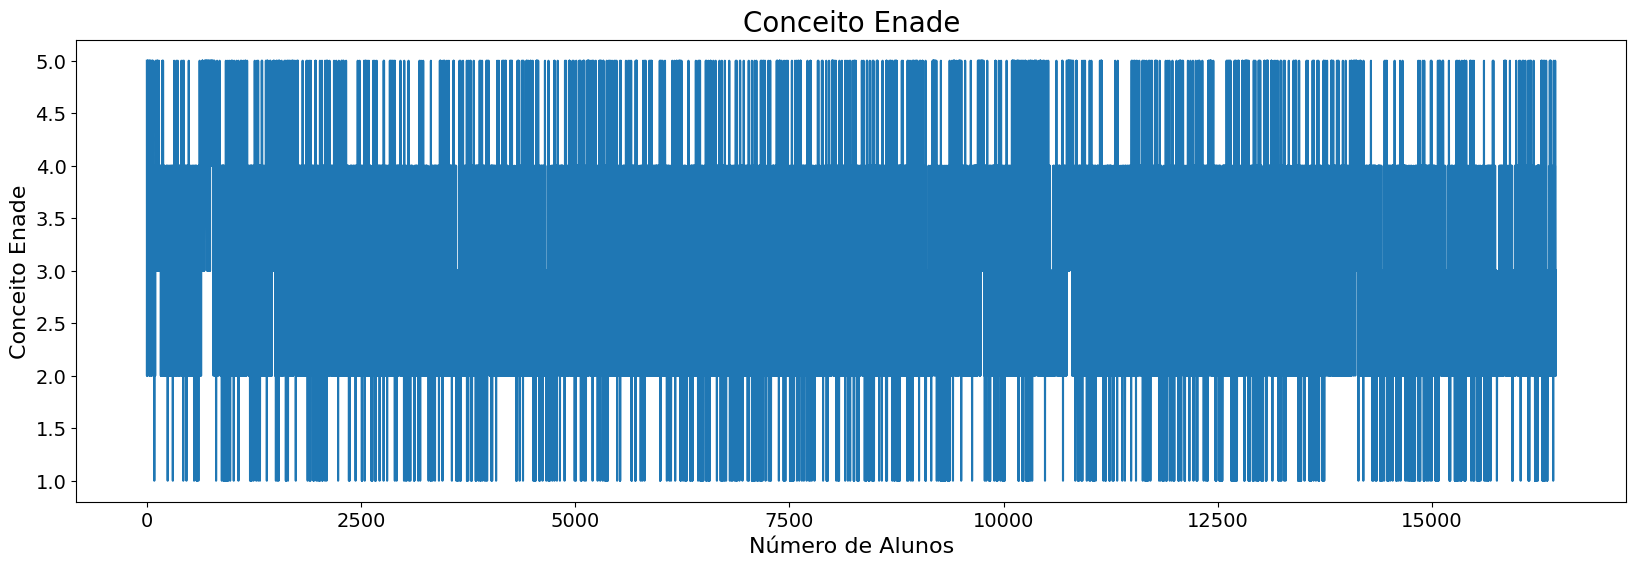

In [11]:
# Análises Gráficas
# Plotando a variável depenndente (Y).

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Conceito Enade', fontsize=20)
ax.set_ylabel('Conceito Enade', fontsize=16)
ax.set_xlabel('Número de Alunos', fontsize=16)
ax = dados['conceito_enade_faixa'].plot(fontsize=14)

In [12]:
import seaborn as sns

<Axes: title={'center': 'Conceito Enade'}, ylabel='Conceito Enade'>

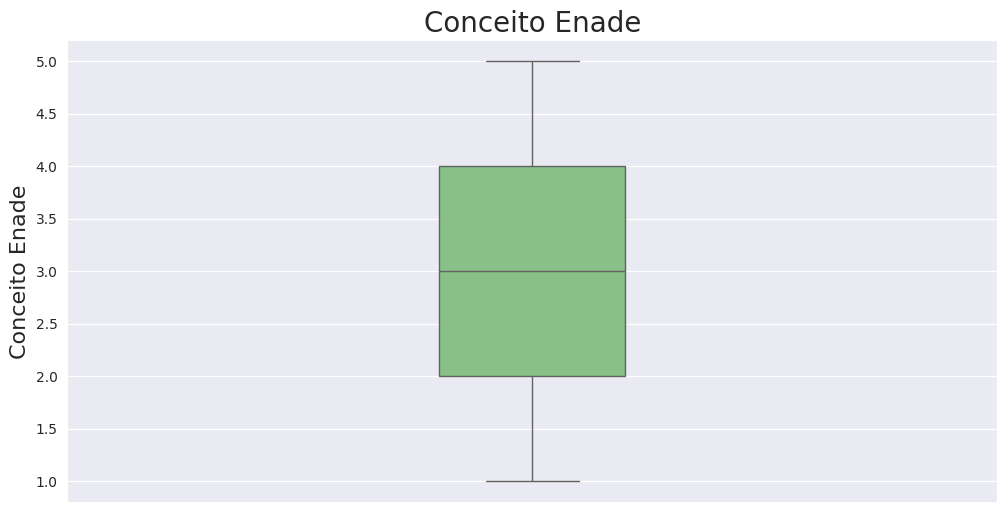

In [13]:
# Box plot da variável dependente (y)


sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.boxplot(data=dados['conceito_enade_faixa'], orient ='v', width=0.2)    # orient = 'h' horizontal e 'v' vertical.
ax.figure.set_size_inches(12, 6)
ax.set_title('Conceito Enade', fontsize=20)
ax.set_ylabel('Conceito Enade', fontsize=16)
ax

<ipython-input-15-984bf974941e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['conceito_enade_faixa'])


<Axes: title={'center': 'Conceito Enade'}, xlabel='conceito_enade_faixa', ylabel='Quantidade de Alunos'>

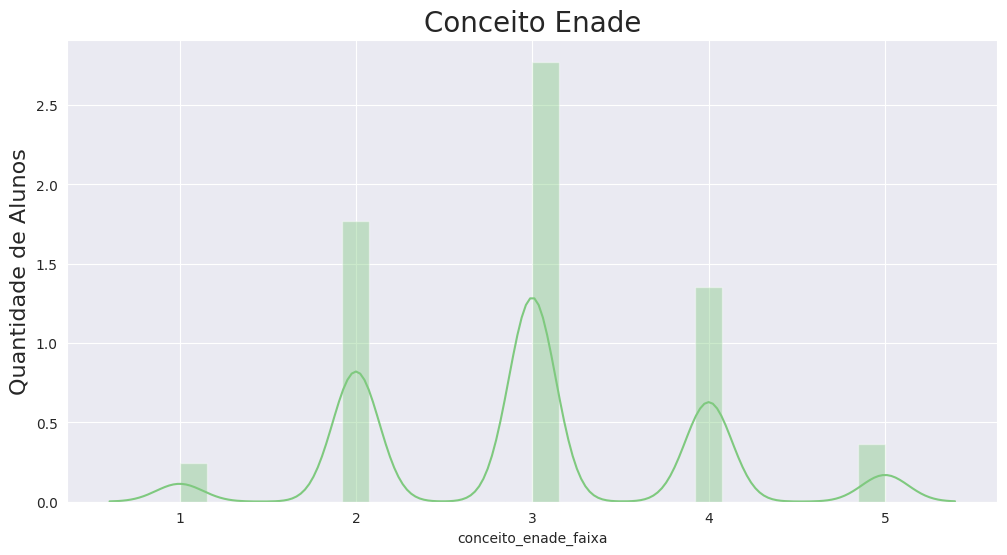

In [15]:
# Distribuição de frequências da variável dependente (Y).

ax = sns.distplot(dados['conceito_enade_faixa'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Conceito Enade', fontsize=20)
ax.set_ylabel('Quantidade de Alunos', fontsize=16)
ax

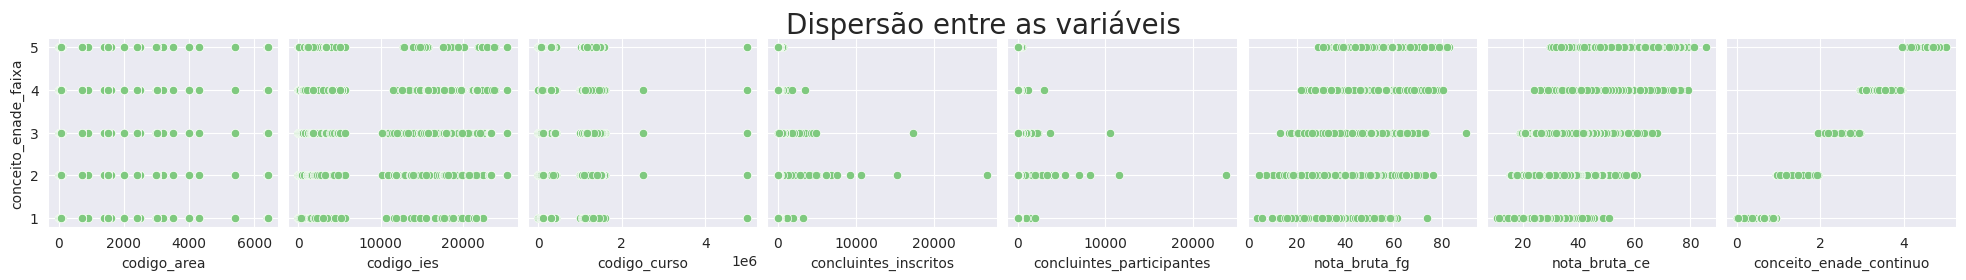

In [16]:
# Plotando o pairplot fixando somente uma variável no eixo Y.

ax = sns.pairplot(dados, y_vars=['conceito_enade_faixa'], x_vars=['codigo_area', 'codigo_ies', 'codigo_curso', 'concluintes_inscritos', 'concluintes_participantes', 'nota_bruta_fg', 'nota_bruta_ce', 'conceito_enade_continuo'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20,  y=1.08)
ax

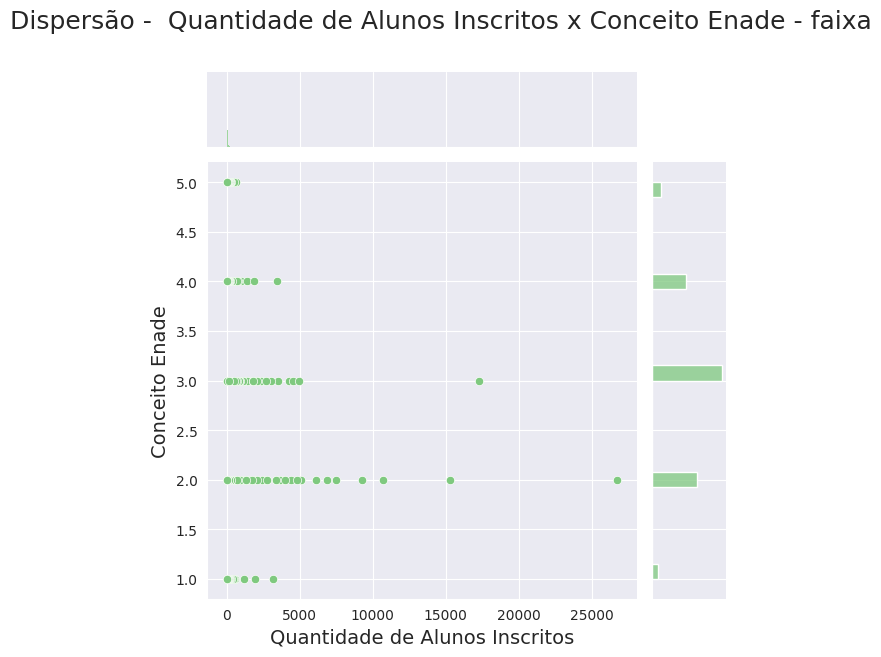

In [20]:
ax = sns.jointplot(x='concluintes_inscritos', y='conceito_enade_faixa', data=dados)
ax.fig.suptitle('Dispersão -  Quantidade de Alunos Inscritos x Conceito Enade - faixa', fontsize=18, y=1.08)
ax.set_axis_labels('Quantidade de Alunos Inscritos', 'Conceito Enade', fontsize=14)
ax

In [21]:
# Importando o train_test_split da biblioteca scikit-learn.

from sklearn.model_selection import train_test_split

In [23]:
# Criando uma Series (pandas) para armazenar o Consumo de Cerveja (Y).

y = dados['conceito_enade_faixa']

In [24]:
# Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X).

X = dados[['Código da Área', 'codigo_curso', 'concluintes_inscritos']]

In [25]:
# Criando os datasets de treino e de teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [26]:
# Verificando os tamanhos dos arquivos gerados pela função train_test_split.

X_train.shape

(11512, 3)

In [27]:
X_test.shape

(4934, 3)

In [28]:
X_train.shape[0] + X_test.shape[0]

16446

In [29]:
# Importando LinearRegression e metrics da biblioteca scikit-learn.

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
# Instanciando a classe LinearRegression().

modelo = LinearRegression()

In [31]:
modelo.fit(X_train, y_train)

LinearRegression()

In [32]:
# Obtendo o coeficiente de determinação do modelo estimado com os dados de TREINO.
# Coeficiente de Determinação - R².
# O coeficiente de determinação é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1.

print('R² = {}'.format(modelo.score(X_train, y_train). round(2)))

R² = 0.01


In [33]:
# Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto 'modelo.

y_previsto = modelo.predict(X_test)

In [34]:
# Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo.
# Lembre-se que o R² mede o quanto da variação da variável dependente é explicada pelo modelo estimado.

print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.01


In [35]:
# Dados de entrada.

entrada = X_test[0:1]
entrada

,codigo_ies,codigo_curso,concluintes_inscritos
15667,4163,110428,20


In [36]:
modelo.predict(entrada)[0]

3.0125117755824866

In [38]:
# Criando um simulador simples.

codigo_ies = 14
codigo_curso = 1115208
concluintes_inscritos = 192
entrada = [[codigo_ies, codigo_curso, concluintes_inscritos]]

print('{} Conceito Enade'.format(modelo.predict(entrada)[0]))

2.946836437753551 Conceito Enade


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
SEED = 40

dt = DecisionTreeClassifier(max_depth = 5, random_state=SEED)

In [49]:
# Treinar a árvore de decisão

modelo = dt.fit(X_train, y_train)
y_previsto = dt.predict(X_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_previsto))
print('Precisão: ', metrics.precision_score(y_test, y_previsto, average='micro')) # Change average to 'micro'
print('Recall: ', metrics.recall_score(y_test, y_previsto, average='micro'))  # Change average to 'micro'
print('F1: ', metrics.f1_score(y_test, y_previsto, average='micro'))

Acurácia:  0.43757600324280505
Precisão:  0.43757600324280505
Recall:  0.43757600324280505
F1:  0.43757600324280505


In [52]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


A acurácia foi 28.35%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
# Dados de entrada.

entrada = X_test[0:1]
entrada

,codigo_ies,codigo_curso,concluintes_inscritos
15667,4163,110428,20


In [54]:
modelo.predict(entrada)[0]

2

In [57]:
# Criando um simulador simples.

codigo_ies = 14
codigo_curso = 1119932
concluintes_inscritos = 23
entrada = [[codigo_ies, codigo_curso, concluintes_inscritos]]

print('{} Conceito Enade'.format(modelo.predict(entrada)[0]))

2 Conceito Enade


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
